# Nome: Henrique Augusto Gomes Togo
# Matrícula: 231111280

## Questão 3

## Parte I

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

Acima são importadas algumas bilbiotecas para auxiliarem na resolução do problema. 

Inicialmente, será treinada uma SVM para classificação sobre um dataset de dados gerados de forma aleatória. O dataset é gerado seguindo uma distribuição normal deslocada. Dessa maneira, é possível "tornar as features quase linearmente separáveis".

Posteriormente, a SVM será treinada para um dataset que possui features sobre parâmetros da transformada de wavelet com o objetivo de identificar cédulas originais. O dataset pode ser encontrado em [Banknote Authentication](https://archive.ics.uci.edu/dataset/267/banknote+authentication).

In [2]:
N = 200
X = np.r_[np.random.randn(N, 2) - [1, 1], np.random.randn(N, 2) + [1, 1]]
dataset_len = len(X)
train_len = round(0.7 * dataset_len)
validation_len = round(0.15 * dataset_len)
y = [0] * N + [1] * N
dataset_raw = np.c_[X, y]
dataset_permuted = np.random.permutation(dataset_raw)
X = dataset_permuted[:, 0:2].astype('float64')
y = dataset_permuted[:,2].astype('int64')

Para realizar o treinamento da SVM, o dataset gerado é separado em três, seguindo as respectivas proporções:

- Dataset de treinamento (70%);
- Dataset de validação (15%);
- Dataset de teste (15%).

Antes da separação, é realizado um shuffle do dataset original.

In [3]:
X_train = np.array(X[0 : train_len])
y_train = np.array(y[0 : train_len])

X_validation = np.array(X[train_len : train_len + validation_len])
y_validation = np.array(y[train_len : train_len + validation_len])

X_test = np.array(X[train_len + validation_len: dataset_len])
y_test = np.array(y[train_len + validation_len: dataset_len])

Aqui, será realizado o treinamento da SVM. Serão utilizadas três funções de Kernel distintas, sendo elas:
- Linear;
- Polinomial;
- Round Basis Function (RBF).

O objetivo é comparar os resultos de cada uma delas no dataset gerado. Posteriormente, as mesmas funções de Kernel serão testadas, no entanto, será utilizado um dataset com informações sobre [Banknote Authentication](https://archive.ics.uci.edu/dataset/267/banknote+authentication).

In [4]:
def acc(label, y_hat):
    return np.round(np.sum(y_hat == label) / len(label) * 100, 2)

In [5]:
c = 1
svm_linear = SVC(C=c, kernel='linear')
svm_linear.fit(X_train, y_train)

svm_poly = SVC(C=c, kernel='poly')
svm_poly.fit(X_train, y_train)

svm_rbf = SVC(C=c, kernel='rbf')
svm_rbf.fit(X_train, y_train)

y_pred_validation_linear = svm_linear.predict(X_validation)
y_pred_test_linear = svm_linear.predict(X_test)
y_pred_train_linear = svm_linear.predict(X_train)

y_pred_validation_poly = svm_poly.predict(X_validation)
y_pred_test_poly = svm_poly.predict(X_test)
y_pred_train_poly = svm_poly.predict(X_train)

y_pred_validation_rbf = svm_rbf.predict(X_validation)
y_pred_test_rbf = svm_rbf.predict(X_test)
y_pred_train_rbf = svm_rbf.predict(X_train)



print('Kernel Linear')
print(f'Acurácia dataset de treinamento {acc(y_train, y_pred_train_linear)}%')
print(f'Acurácia dataset de validação {acc(y_validation, y_pred_validation_linear)}%')
print(f'Acurácia dataset de teste {acc(y_test, y_pred_test_linear)}%')
print(40*'=')

print('Kernel Linear')
print(f'Acurácia dataset de treinamento {acc(y_train, y_pred_train_poly)}%')
print(f'Acurácia dataset de validação {acc(y_validation, y_pred_validation_poly)}%')
print(f'Acurácia dataset de teste {acc(y_test, y_pred_test_poly)}%')
print(40*'=')

print('Kernel Round Basis Function')
print(f'Acurácia dataset de treinamento {acc(y_train, y_pred_train_rbf)}%')
print(f'Acurácia dataset de validação {acc(y_validation, y_pred_validation_rbf)}%')
print(f'Acurácia dataset de teste {acc(y_test, y_pred_test_rbf)}%')
print(40*'=')

Kernel Linear
Acurácia dataset de treinamento 91.79%
Acurácia dataset de validação 93.33%
Acurácia dataset de teste 90.0%
Kernel Linear
Acurácia dataset de treinamento 90.71%
Acurácia dataset de validação 90.0%
Acurácia dataset de teste 90.0%
Kernel Round Basis Function
Acurácia dataset de treinamento 92.14%
Acurácia dataset de validação 93.33%
Acurácia dataset de teste 90.0%


Para esse caso, utilizou-se um valor de C de 1 para obter as acurácias. Como pode ser observado, o kernel linear já consegue classificar muito bem os exemplos que foram apresentados, obtendo uma acurácia elevada para o dataset de teste. Mas o exemplo apresentado foi apenas uma maneira didática de apresentar os resultados. A seguir, são plotados os pontos do dataset de teste e a fronteira de decisão da SVM com kernel linear.

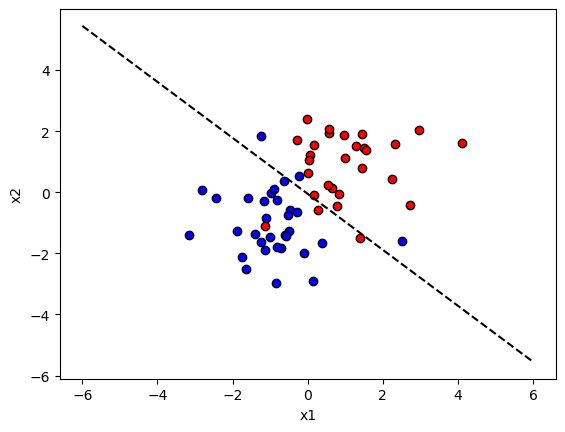

In [6]:
x1 = 0
x2 = 1
for i in range(len(X_test)):
    if y_test[i] == 0:
        plt.plot(X_test[i, x1], X_test[i, x2], 'bo', markeredgecolor='k')
    else:
        plt.plot(X_test[i, x1], X_test[i, x2], 'ro', markeredgecolor='k')
plt.xlabel('x1')
plt.ylabel('x2')


w = svm_linear.coef_[0]           
w0 = svm_linear.intercept_[0]      
x1_grid = np.linspace(-6, 6)   
x2_grid = -(w[x1] / w[x2]) * x1_grid - w0 / w[x2]  

plt.plot(x1_grid, x2_grid, '--k')
plt.show()

Percebe-se que a SVM linear consegue separar bem os dados. Mas deve-se levar em consideração que os dados foram gerados de forma a privilegiar a utilização do kernel linear.

## Parte II

A seguir, é utilizado um dataset com as informações de [Banknote Authentication](https://archive.ics.uci.edu/dataset/267/banknote+authentication). O dataset é composto por 4 features sendo elas:

- Variance of Wavelet Trasnformed Image;
- Skewness of Wavelet Transformed Image;
- Curtosis of Wavelet Trasnformed Image;
- Entropy of Image.

Além disso o dataset contém as classes de cada um dos exemplos. O dataset foi gerado de imagens de cédulas verdadeiras e cédulas falsas reais.

In [7]:
dataset_raw = np.loadtxt("data_banknote_authentication.txt", delimiter=",", dtype=float)
dataset_len = len(dataset_raw)

train_len = round(0.7 * dataset_len)
validation_len = round(0.15 * dataset_len)
dataset_permuted = np.random.permutation(dataset_raw)

X = dataset_permuted[:, 0:4].astype('float64')
y = dataset_permuted[:,4].astype('int64')
attributes = {0: 'Variance Wavelet Transform', 1: 'Skewness Wavelet Transform', 2: 'Curtosis Wavelet Transform', 3:'Entropy'}

Para realizar o treinamento da SVM, o dataset original é separado em três, seguindo as respectivas proporções:

- Dataset de treinamento (70%);
- Dataset de validação (15%);
- Dataset de teste (15%).

Antes da separação, é realizado um shuffle do dataset original.

In [8]:
X_train = np.array(X[0 : train_len])
y_train = np.array(y[0 : train_len])

X_validation = np.array(X[train_len : train_len + validation_len])
y_validation = np.array(y[train_len : train_len + validation_len])

X_test = np.array(X[train_len + validation_len: dataset_len])
y_test = np.array(y[train_len + validation_len: dataset_len])

A seguir, serão treinadas SVMs com três diferentes kernels, com variação de parâmetros. O intuito é observar como cada parâmetro influencida na acurácia do modelo.

In [9]:
c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
degree = [1, 2, 3, 4, 5, 6, 7]

acc_matrix_linear = np.zeros(len(c))
acc_matrix_poly = np.zeros((len(c), len(gamma)))
acc_matrix_rbf = np.zeros((len(c), len(degree)))

# Treinamento Linear
for i in range(len(c)):
    svm_linear = SVC(C=c[i], kernel='linear')
    svm_linear.fit(X_train, y_train)
    y_pred_train_linear = svm_linear.predict(X_train)
    y_pred_validation_linear = svm_linear.predict(X_validation)
    y_pred_test_linear = svm_linear.predict(X_test)
    acc_matrix_linear[i] = acc(y_test, y_pred_test_linear)

for i in range(len(c)):
    for j in range(len(degree)):
        svm_poly = SVC(C=c[i], degree=degree[j], kernel='poly')
        svm_poly.fit(X_train, y_train)
        y_pred_train_poly = svm_poly.predict(X_train)
        y_pred_validation_poly = svm_poly.predict(X_validation)
        y_pred_test_poly = svm_poly.predict(X_test)
        acc_matrix_poly[i, j] = acc(y_test, y_pred_test_poly)

for i in range(len(c)):
    for j in range(len(gamma)):
        svm_rbf = SVC(C=c[i], gamma=gamma[j], kernel='rbf')
        svm_rbf.fit(X_train, y_train)
        y_pred_train_rbf = svm_rbf.predict(X_train)
        y_pred_validation_rbf = svm_rbf.predict(X_validation)
        y_pred_test_rbf = svm_rbf.predict(X_test)
        acc_matrix_rbf[i, j] = acc(y_test, y_pred_test_rbf)


Para os parâmetros variando conforme especificado na célula anterior, é possível gerar gráficos para se observar qual a combinação de parâmetros que resultam em uma maior acurácia de teste.

Para a SVM com kernel linear, pode-se observar que para valores muito pequenos do parâmetro C, a acurácia de teste é menor.

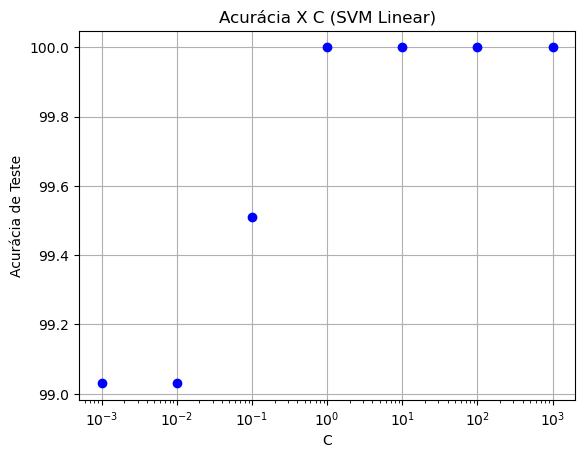

In [10]:
plt.semilogx(c, acc_matrix_linear, 'bo')
plt.xlabel('C')
plt.ylabel('Acurácia de Teste')
plt.grid()
plt.title('Acurácia X C (SVM Linear)')
plt.show()

Para a SVM com kernel polinomial, percebe-se que os pontos mais claros são aqueles que resultam em uma maior acurácia do modelo. Vale lembrar que a imagem mostra não os valores de C e da Ordem do polinomio, mas sim o índice corresponde ao vetor definido c = [0.001, 0.01, 0.1, 1, 10, 100, 1000] e degree = [1, 2, 3, 4, 5, 6, 7]

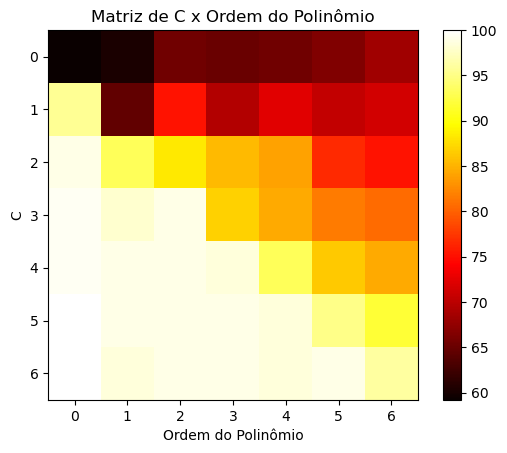

In [11]:
plt.imshow(acc_matrix_poly, cmap='hot')
plt.title('Matriz de C x Ordem do Polinômio')        
plt.colorbar()
plt.xlabel("Ordem do Polinômio")
plt.ylabel("C")
plt.show()

Para a SVM com kernel rbf, percebe-se que os pontos mais claros são aqueles que resultam em uma maior acurácia do modelo. Vale lembrar que a imagem mostra não os valores de C e do parâmetro gamma, mas sim o índice corresponde ao vetor definido c = [0.001, 0.01, 0.1, 1, 10, 100, 1000] e gamma = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

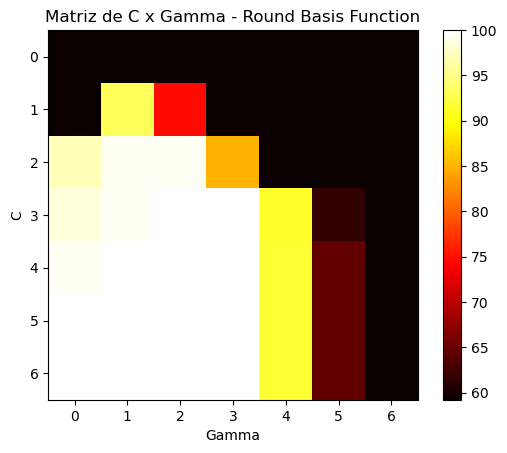

In [12]:
plt.imshow(acc_matrix_rbf, cmap='hot')
plt.title('Matriz de C x Gamma - Round Basis Function')
plt.colorbar()
plt.xlabel("Gamma")
plt.ylabel("C")
plt.show()